In [3]:
import pandas as pd
import seaborn as sns

# Bug Fix Benchmark Analysis

In [4]:
# Replace with the location of your result files.
DECOMPOSITION_PERFORMANCE_PATH='decompositions.csv'
METRICS_PATH='metrics.csv'

## Performance

In [5]:
df_performance = pd.read_csv(DECOMPOSITION_PERFORMANCE_PATH, names=['project', 'bug_id', 'smartcommit_rand_index',
                                                                    'flexeme_rand_index'])
df_performance.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index
0,Cli,10,0.780000,0.348790
1,Cli,11,1.000000,1.000000
2,Cli,12,0.576879,0.432089
3,Cli,13,0.486631,0.500891
4,Cli,14,0.857838,0.836417


In [6]:
df_performance.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index
count,806.000000,806.000000,806.000000
mean,47.209677,0.717829,0.545648
std,41.081884,0.173262,0.172115
min,1.000000,0.194444,0.166667
25%,15.000000,0.562559,0.452704
50%,34.000000,0.711742,0.501319
75%,71.000000,0.861977,0.608672
max,176.000000,1.000000,1.000000


In [7]:
df_performance.groupby(['project']).agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median'})

,bug_id,smartcommit_rand_index,flexeme_rand_index
project,,,
Cli,39,0.691954,0.491765
Closure,174,0.638174,0.509540
Codec,18,0.718090,0.508518
Collections,4,0.964031,0.737615
Compress,46,0.828201,0.465383
Csv,16,0.789242,0.630149
Gson,18,0.763325,0.532028
JacksonCore,26,0.616954,0.495252
JacksonDatabind,112,0.689469,0.505570


In [8]:
df_performance.agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median'})

bug_id                    806.000000
smartcommit_rand_index      0.711742
flexeme_rand_index          0.501319
dtype: float64

In [9]:
df_perf_melted = pd.melt(df_performance, id_vars=['project', 'bug_id'])
df_perf_melted.head()

,project,bug_id,variable,value
0,Cli,10,smartcommit_rand_index,0.780000
1,Cli,11,smartcommit_rand_index,1.000000
2,Cli,12,smartcommit_rand_index,0.576879
3,Cli,13,smartcommit_rand_index,0.486631
4,Cli,14,smartcommit_rand_index,0.857838


### Statistical Significance and Effect Size

In [8]:
# Please use the RQ1.R instead of the code below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

# model = smf.mixedlm(formula='value ~ variable', data=df_perf_melted, groups=df_perf_melted['project'])
# result = model.fit()
# result.summary()

## Metrics

In [10]:
df_metrics = pd.read_csv(METRICS_PATH, names=['project', 'bug_id', 'files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
df_metrics.head()

,project,bug_id,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Cli,10,2,1,3,8.333333,25
1,Cli,11,2,1,2,9.000000,18
2,Cli,12,2,1,6,14.000000,84
3,Cli,13,5,1,8,4.250000,34
4,Cli,14,2,1,4,19.750000,79


# Correlation between perfromance and metrics

In [11]:
df = pd.merge(df_performance, df_metrics,  how='left', on=['project','bug_id'])
df.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Cli,10,0.780000,0.348790,2.0,1.0,3.0,8.333333,25.0
1,Cli,11,1.000000,1.000000,2.0,1.0,2.0,9.000000,18.0
2,Cli,12,0.576879,0.432089,2.0,1.0,6.0,14.000000,84.0
3,Cli,13,0.486631,0.500891,5.0,1.0,8.0,4.250000,34.0
4,Cli,14,0.857838,0.836417,2.0,1.0,4.0,19.750000,79.0


In [11]:
df.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
count,660.000000,660.000000,660.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,49.687879,0.719133,0.518434,3.814873,1.205696,11.227848,8.422018,81.835443
std,42.768170,0.174196,0.155999,3.582255,1.412677,16.204575,11.543863,136.201892
min,1.000000,0.194444,0.166667,1.000000,0.000000,1.000000,1.500000,3.000000
25%,15.000000,0.563307,0.430037,2.000000,1.000000,4.000000,4.428571,24.000000
50%,37.000000,0.713607,0.492501,3.000000,1.000000,6.000000,6.369318,46.000000
75%,76.000000,0.867110,0.560818,4.000000,1.000000,11.000000,9.756944,89.250000
max,176.000000,1.000000,1.000000,51.000000,28.000000,190.000000,258.375000,2067.000000


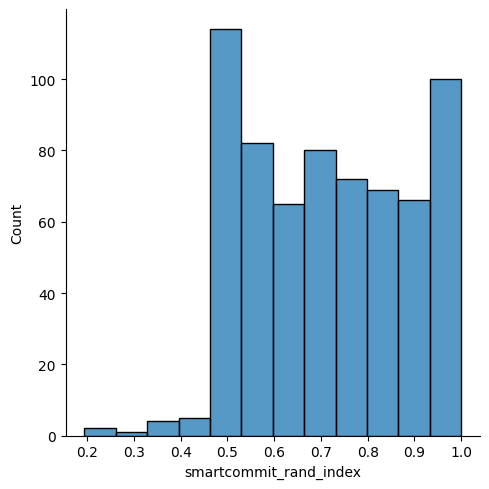

In [12]:
sns.displot(df, x="smartcommit_rand_index")

[Text(0.5, 1.0, 'Performance vs Lines')]

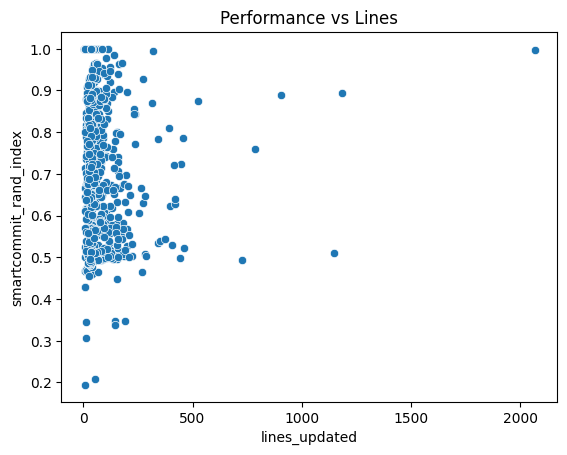

In [13]:
sns.scatterplot(df, x="lines_updated", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Files')]

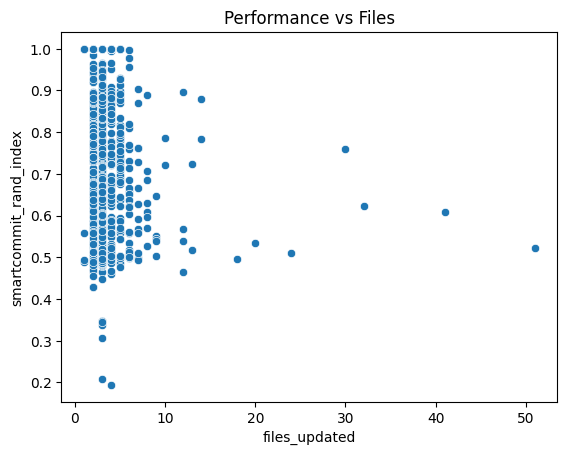

In [14]:
sns.scatterplot(df, x="files_updated", y="smartcommit_rand_index").set(title="Performance vs Files")

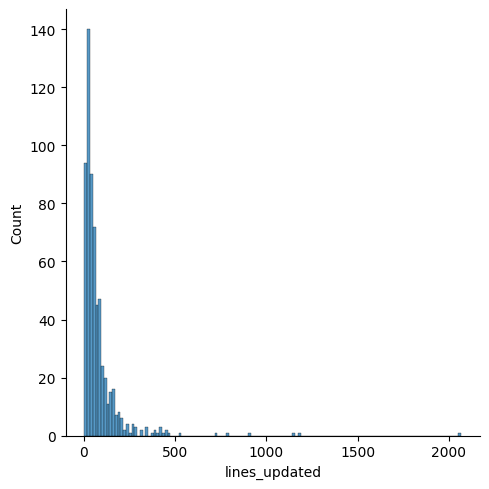

In [15]:
sns.displot(df, x="lines_updated")

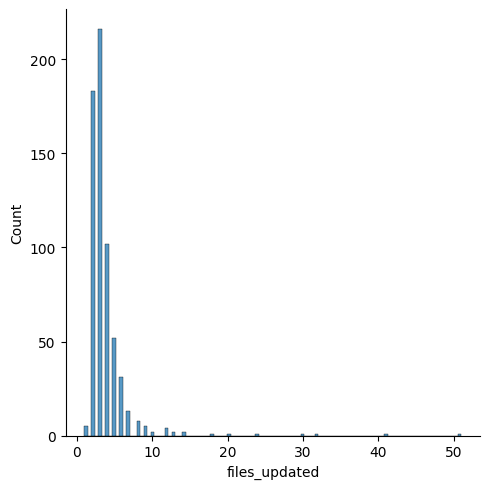

In [16]:
sns.displot(df, x="files_updated")

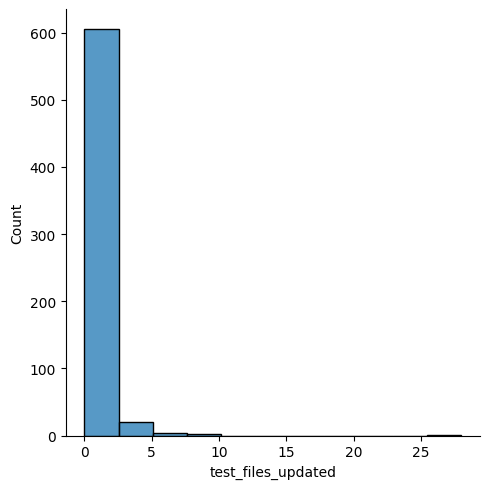

In [17]:
sns.displot(df, x="test_files_updated")

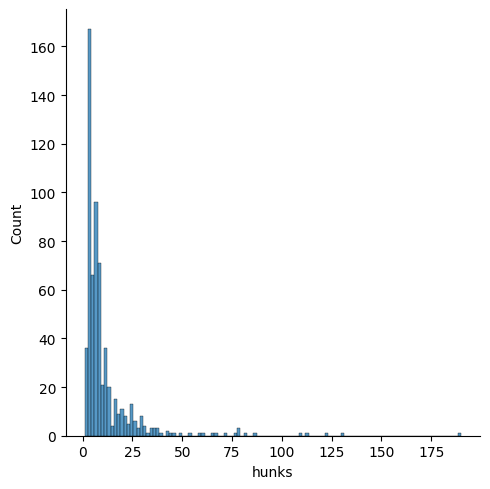

In [18]:
sns.displot(df, x="hunks")

<Axes: >

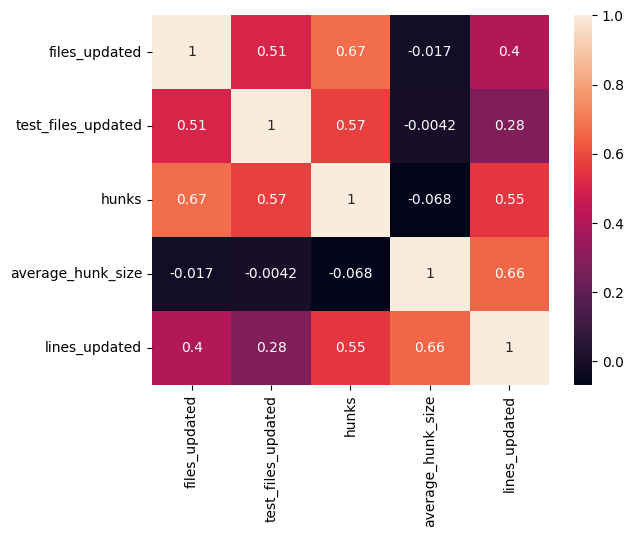

In [19]:
features = list(['files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
correlation_matrix = df[features].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [45]:
df_time = pd.read_csv("../out/time.csv", names=['project', 'bug_id', 'tool', 'time'])
df_time.head()

FileNotFoundError: [Errno 2] No such file or directory: '../out/time.csv'

In [ ]:
df_time.groupby('tool').mean()

In [ ]:
df.describe()

In [ ]:
df.groupby('project')['project'].count()

## Statistical Significance and Effect Size

In [12]:
df.to_csv('merge.csv', index=False)
# Please use the RQ2.R instead of the code cell below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

In [ ]:
# formula = 'smartcommit_rand_index ~ files_updated+test_files_updated+hunks+average_hunk_size+lines_updated'
# model = smf.mixedlm(formula = formula, data=df, groups=df['project'])
# result = model.fit()
# # pd.options.display.max_rows = 4000
#
# result.summary()

### Tisane test (WIP)

In [ ]:
import tisane as ts
import pandas as pd

## Load data
df = pd.read_csv("./exercise_simple.csv")

## Declare observed variables
# The researchers observe participants/cases (observational unit).
pid = ts.Unit("case", cardinality=245) # pid is an observational unit. There are 245 adults.

# Each pid (cause/adult) has an age measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable age.
# Note: By default, number_of_instances equals 1. The parameter value is explicitly set below for clarity.
age = pid.numeric("age", number_of_instances=1)  # participant age

# Each pid has an exercise measure, which is numeric .
# Verbose: Each instance of pid has one instance of a numeric variable exercise.
exercise = pid.numeric("exercise")  # years of vigorous physical exercise

# Each pid has an endurance measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable endurance.
endurance = pid.numeric("endurance") # number of minutes of sustained jogging on a treadmill

## Declare conceptual relationships between the observed variables
exercise.causes(endurance)
age.associates_with(endurance)

## Query relatioships to infer a statistical model and generate a script
# Author query by partially authoring a statistical model as a Design
design = ts.Design(dv=endurance, ivs=[age, exercise]).assign_data(df)
ts.infer_statistical_model_from_design(design=design)